## Pacotes

In [28]:
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from fancyimpute import SoftImpute

## Datasets

In [2]:
# Small_df
df_small_train = pd.read_csv(zipfile.ZipFile('../../dist/orange_small_train.data.zip').open('orange_small_train.data'),sep='\t')
df_small_test = pd.read_csv(zipfile.ZipFile('../../dist/orange_small_test.data.zip').open('orange_small_test.data'),sep='\t')

# labels
df_small_train['appetency'] = pd.read_csv('../../dist/orange_small_train_appetency.labels',header = None)
df_small_train['churn'] = pd.read_csv('../../dist/orange_small_train_churn.labels',header = None)
df_small_train['upselling'] = pd.read_csv('../../dist/orange_small_train_upselling.labels',header = None)

In [3]:
df_small_train.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var186,Var187,Var188,Var189,Var190,Var209,Var230,appetency,churn,upselling
count,702.000000,1241.000000,1240.000000,1579.000000,1.487000e+03,44471.000000,44461.000000,0.0,702.000000,1.487000e+03,...,702.000000,702.00000,1241.000000,21022.000000,333.000000,0.0,0.0,50000.00000,50000.00000,50000.000000
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,NaN,48.145299,3.926057e+05,...,3.299145,16.54416,167.368477,270.142137,22007.045192,NaN,NaN,-0.96440,-0.85312,-0.852720
std,40.709951,0.141933,4270.193518,1.275481,6.441259e+05,2685.693668,6.326053,NaN,154.777855,9.280896e+05,...,8.781967,60.22303,113.980072,86.707692,29085.146490,NaN,NaN,0.26445,0.52172,0.522373
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN,-1.00000,-1.00000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000,0.00000,19.380000,204.000000,2732.670000,NaN,NaN,-1.00000,-1.00000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,861.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000,4.00000,197.640000,270.000000,12668.940000,NaN,NaN,-1.00000,-1.00000,-1.000000
75%,16.000000,0.000000,0.000000,0.000000,1.187425e+05,1428.000000,7.000000,NaN,46.000000,2.628630e+05,...,6.000000,14.00000,252.960000,330.000000,29396.340000,NaN,NaN,-1.00000,-1.00000,-1.000000
max,680.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,NaN,2300.000000,1.232559e+07,...,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN,1.00000,1.00000,1.000000


# Data Cleaning, Preparation &  Missing Values

##  #6 - Selecionar fatos com 30%+ de dados

In [4]:
df = df_small_train.copy()
df_v2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]

print("Lista de fatos excluídos:", end=" ")

for c in df.columns:
    if c not in df_v2.columns:
        print(c, end=", ")

Lista de fatos excluídos: Var1, Var2, Var3, Var4, Var5, Var8, Var9, Var10, Var11, Var12, Var14, Var15, Var16, Var17, Var18, Var19, Var20, Var23, Var26, Var27, Var29, Var30, Var31, Var32, Var33, Var34, Var36, Var37, Var39, Var40, Var41, Var42, Var43, Var45, Var46, Var47, Var48, Var49, Var50, Var51, Var52, Var53, Var54, Var55, Var56, Var58, Var59, Var60, Var61, Var62, Var63, Var64, Var66, Var67, Var68, Var69, Var70, Var71, Var75, Var77, Var79, Var80, Var82, Var84, Var86, Var87, Var88, Var89, Var90, Var91, Var92, Var93, Var95, Var96, Var97, Var98, Var99, Var100, Var101, Var102, Var103, Var104, Var105, Var106, Var107, Var108, Var110, Var111, Var114, Var115, Var116, Var117, Var118, Var120, Var121, Var122, Var124, Var127, Var128, Var129, Var130, Var131, Var135, Var136, Var137, Var138, Var139, Var141, Var142, Var145, Var146, Var147, Var148, Var150, Var151, Var152, Var154, Var155, Var156, Var157, Var158, Var159, Var161, Var162, Var164, Var165, Var166, Var167, Var168, Var169, Var170, Var171, Va

In [5]:
df_v2.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var222,Var223,Var225,Var226,Var227,Var228,Var229,appetency,churn,upselling
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,fXVEsaq,jySVZNlOJy,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,-1,-1,-1
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,2Kb5FSF,LM8l689qOp,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,-1,1,-1
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,NKv4yOc,jySVZNlOJy,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,-1,-1,-1
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,CE7uk3u,LM8l689qOp,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,-1,-1,-1
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,1J2cvxe,LM8l689qOp,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,-1,-1,-1


## #7 - Criação de dummies para modelos

In [6]:
#df_v2.iloc[0:100].copy()
df_v3 = df_v2.copy()

for cat_feature in df_v3.select_dtypes(include=['object']).columns:
    df_v3[cat_feature] = pd.Categorical(df_v3[cat_feature]).codes
    df_v3[cat_feature] = df_v3[cat_feature].replace(-1,np.nan)
    
df_v3.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var222,Var223,Var225,Var226,Var227,Var228,Var229,appetency,churn,upselling
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,2964,3.0,NaN,22,2,8,NaN,-1,-1,-1
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,125,0.0,NaN,14,2,8,NaN,-1,1,-1
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,1610,3.0,1.0,10,0,25,0.0,-1,-1,-1
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,817,0.0,NaN,7,2,8,NaN,-1,-1,-1
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,65,0.0,1.0,7,2,8,1.0,-1,-1,-1


## #8 - Tratamento de missing values

In [ ]:
imp_cols = df_v3.columns.values
imputer = SoftImpute()
df_v4 = pd.DataFrame(imputer.fit_transform(df_v3), columns= imp_cols)

In [25]:
df_v4.describe()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var222,Var223,Var225,Var226,Var227,Var228,Var229,appetency,churn,upselling
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000
mean,1213.705375,6.291926,1155.994344,215.249280,268.826444,4.050453,90.388067,207.385817,0.678358,2.313663e+06,...,2123.702060,0.438830,0.519871,10.115720,2.103060,10.233400,0.365796,-0.96440,-0.85312,-0.852720
std,2555.028715,6.184516,2652.413402,536.540661,671.748154,9.270251,204.452935,107.853194,2.846110,2.964154e+06,...,1183.541455,0.978905,0.510748,5.798438,0.867994,6.488254,0.379083,0.26445,0.52172,0.522373
min,-1485.535859,-8.606757,-1622.655507,-293.000540,-363.295987,-8.015069,-154.718283,-254.655372,-1.582611,-5.211606e+05,...,0.000000,-0.094195,-0.672577,0.000000,0.000000,0.000000,-0.505942,-1.00000,-1.00000,-1.000000
25%,388.901508,0.000000,0.000000,80.000000,100.000000,0.000000,16.000000,166.560000,0.000000,0.000000e+00,...,1066.000000,0.000000,0.003333,6.000000,2.000000,8.000000,0.000006,-1.00000,-1.00000,-1.000000
50%,805.000000,7.000000,252.414505,140.000000,175.000000,2.000000,48.000000,200.000000,0.000000,5.807610e+05,...,2230.000000,0.000000,0.530253,10.000000,2.000000,8.000000,0.280015,-1.00000,-1.00000,-1.000000
75%,1323.000000,7.000000,1328.000000,212.000000,265.000000,4.000000,104.000000,257.200000,0.000000,4.241100e+06,...,2984.250000,0.016101,1.000000,14.000000,2.000000,8.000000,0.531966,-1.00000,-1.00000,-1.000000
max,131761.000000,140.000000,197872.000000,36272.000000,45340.000000,494.000000,13168.000000,5158.560000,110.000000,1.884690e+07,...,4290.000000,3.000000,2.000000,22.000000,6.000000,29.000000,3.000000,1.00000,1.00000,1.000000


# Exploratory Data Analysis

## #9 - Histogramas

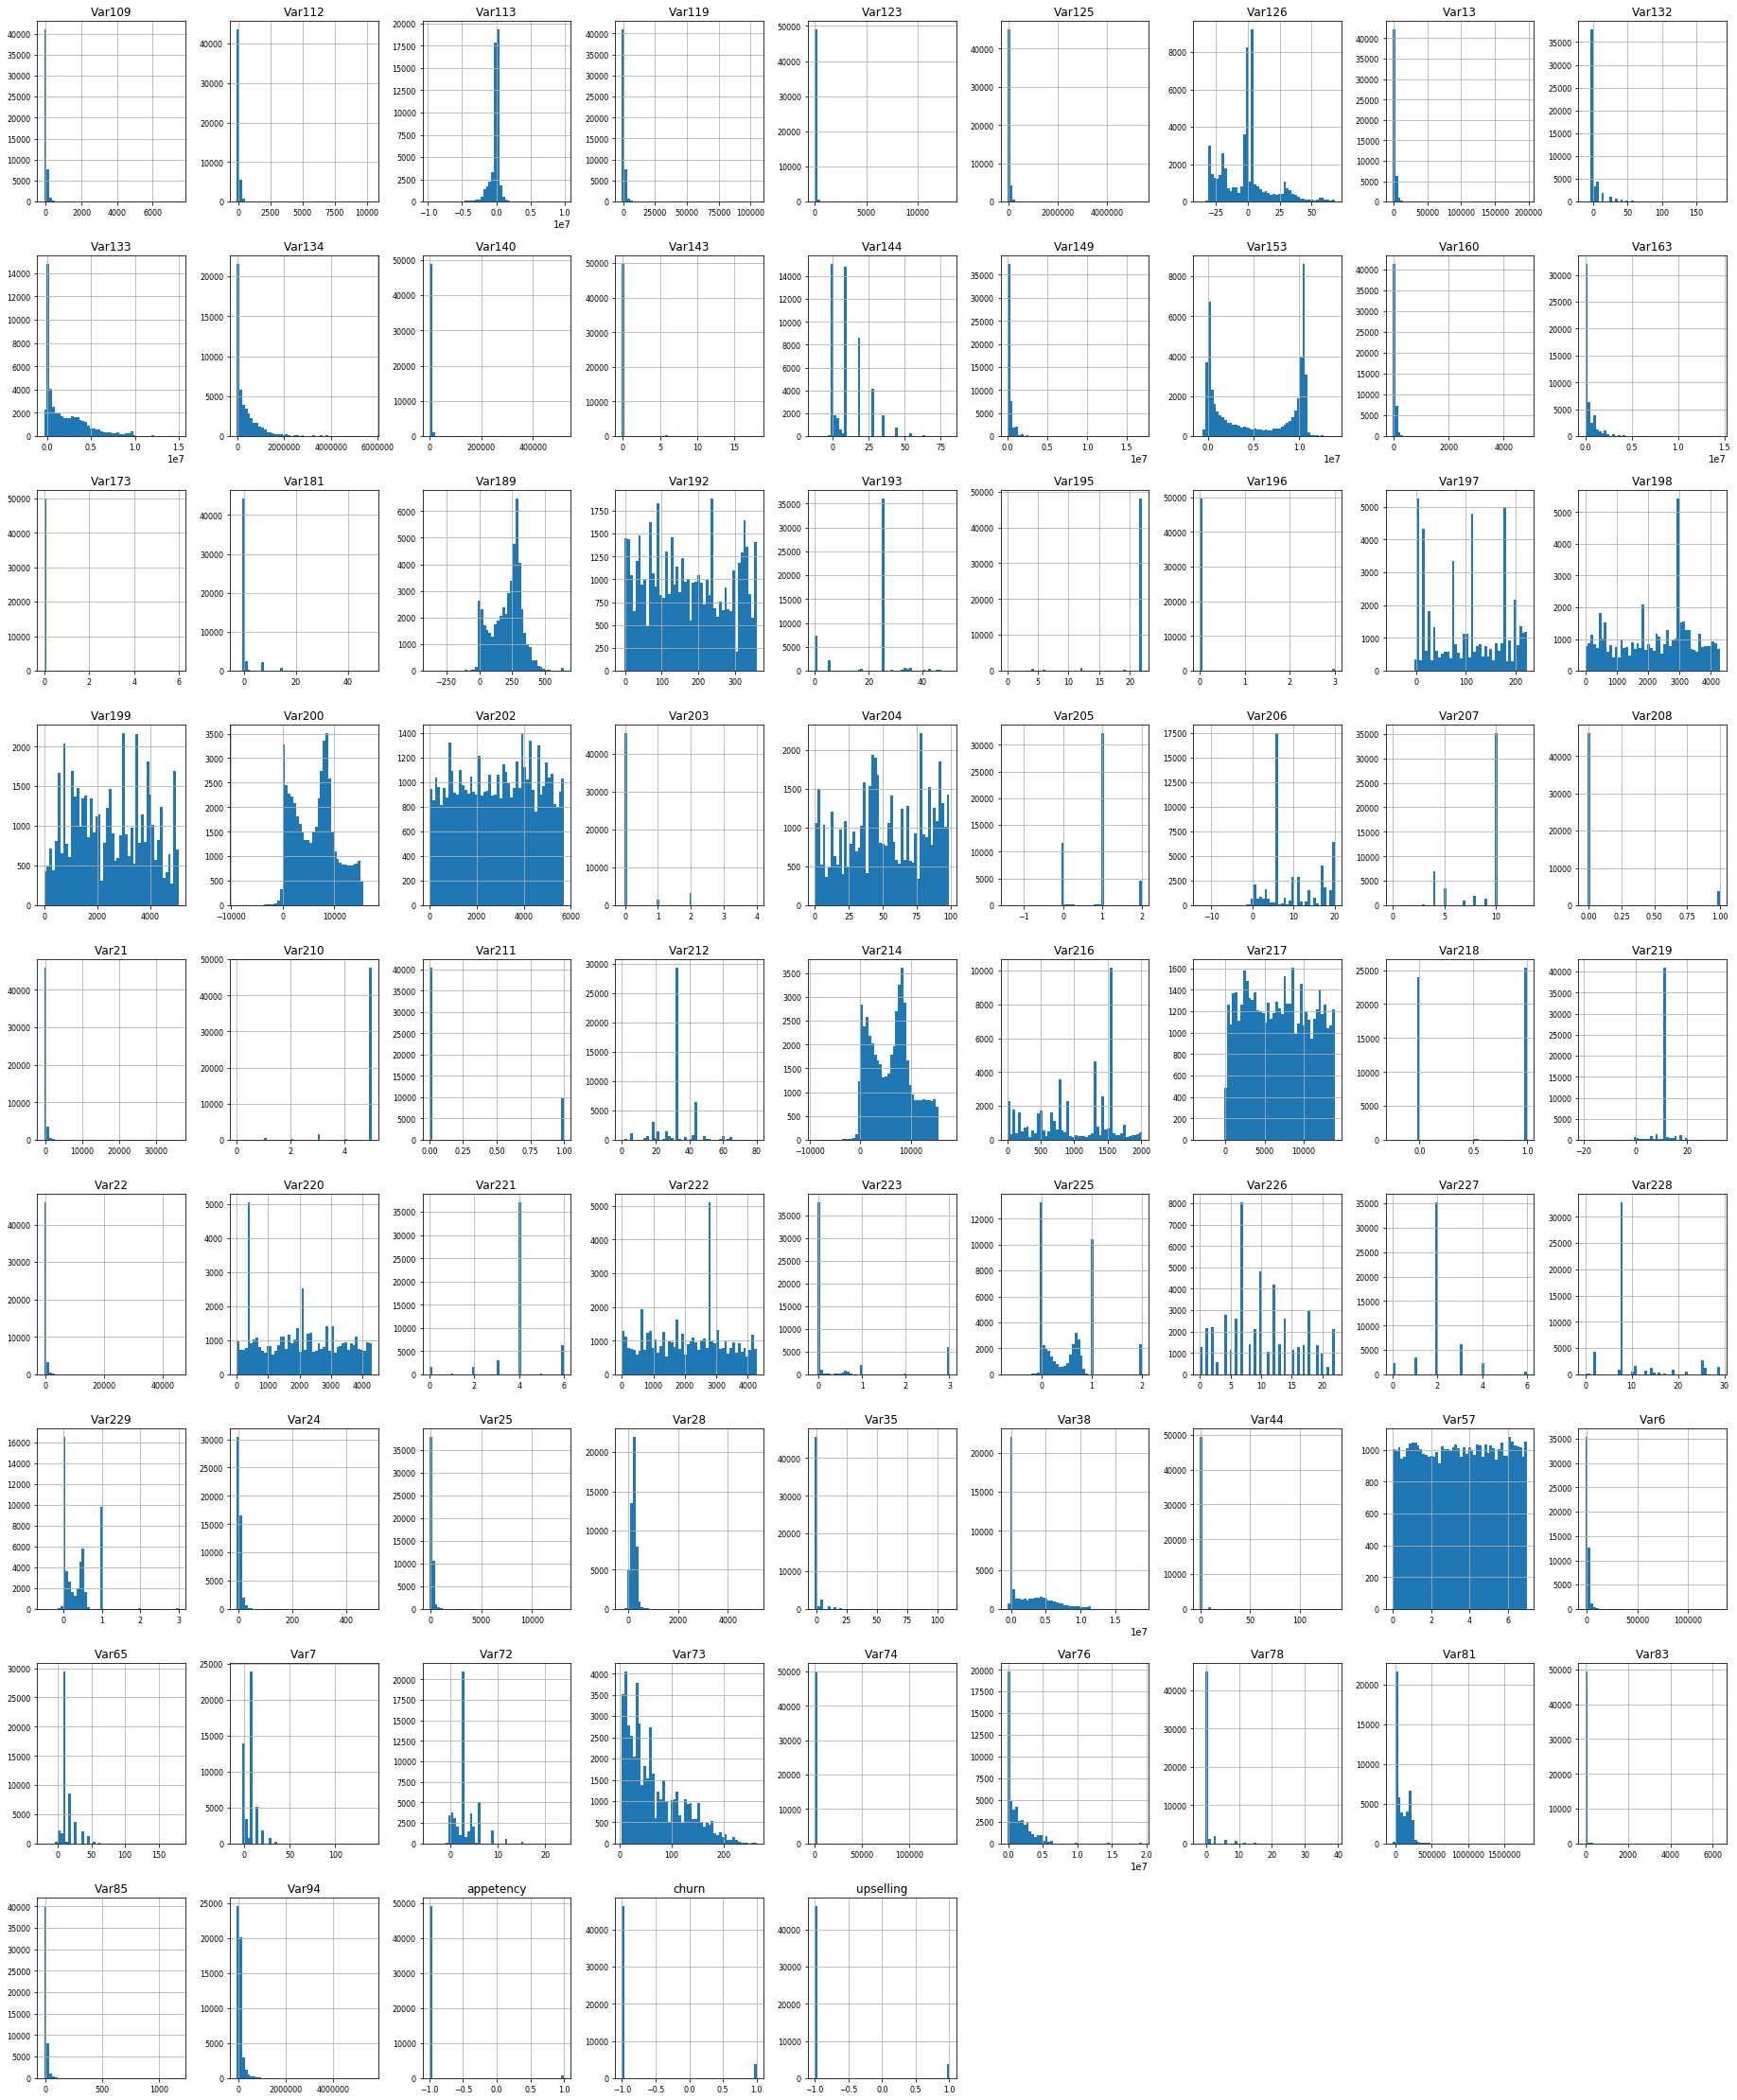

In [43]:
df_v4.hist(figsize=(32, 40), bins=50, xlabelsize=8, ylabelsize=8);

## #10 - Regressão linear (out)

In [ ]:
# features_to_analyse = df_v4.columns

# fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (32,40))

# for i, ax in enumerate(fig.axes):
#     if i < len(features_to_analyse) - 1:
#         sns.regplot(x=features_to_analyse[i],y='appetency', data=df_v4[features_to_analyse], ax=ax)

## #11 - Matriz de correlação

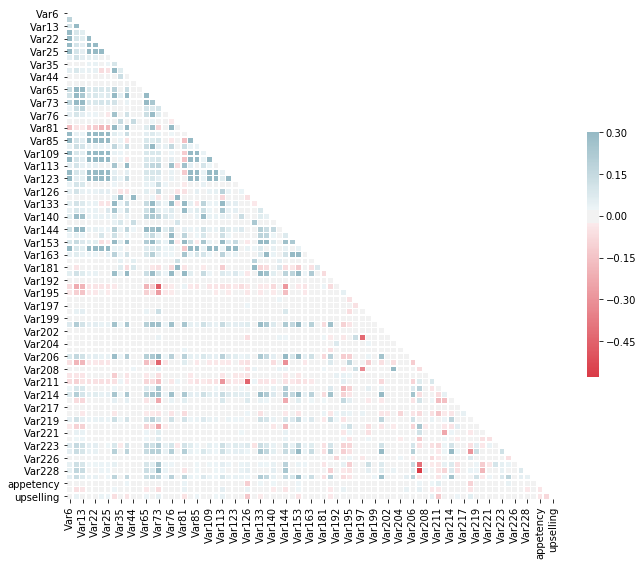

In [54]:
corr = df_v4.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=False, annot_kws={"size": 8}, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [67]:
var_interesse = corr[['appetency','churn','upselling']]
var_interesse = var_interesse.drop(['appetency','churn','upselling'])
var_interesse.describe()

,appetency,churn,upselling
count,74.000000,74.000000,74.000000
mean,0.001932,-0.001745,-0.001120
std,0.022080,0.022839,0.031103
min,-0.109824,-0.067534,-0.135380
25%,-0.005029,-0.010635,-0.011093
50%,0.003150,-0.005201,0.002771
75%,0.008274,0.010309,0.013282
max,0.062471,0.053845,0.059851
